In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

更改處：  
1. 增加import -> `import tensorflow as tf`
1. 神經網路層數  
2. 把activation function 從ReLU改成ELU
3. 把神經網路的compilie optimizer從SGD改為RMSprop  
4. 把optimizer的learning rate改為0.002  
6. 由於範例中`predict = model.predict_classes(x_test)`出現錯誤  
因此我它分開，改為：  
`predict_x = model.predict(x_test)`和  
`classes_x=np.argmax(predict_x,axis=1)`
7. 把已經不存在的`predict[n]`改為`classes_x[n]`
8. 最後，把n從9999改為779並執行


### 1. 讀入 MNSIT 數據集

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#### 你也可以讀入 Fasion 版的 MNIST

In [5]:
# from tensorflow.keras.datasets import fashion_mnist
# (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### 2. 欣賞數據集內容 (非執行必要)

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
n = 9487

In [9]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [10]:
y_train[n]

1

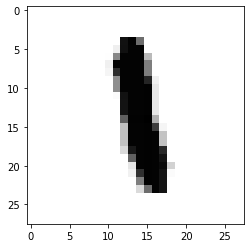

In [11]:
plt.imshow(x_train[n], cmap='Greys')

### 3. 資料整理

先看個範例, 因為 `numpy` 「廣播」的特性, 我們對 `array` 中所有數字要同除以一個數可瞬間完成!

In [12]:
x_train = x_train.reshape(60000, 784)/255
x_test = x_test.reshape(10000, 784)/255

In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 4. step 1: 打造神經網路

In [14]:
model = Sequential()

將`relu`改為`elu`

In [15]:
model.add(Dense(100, input_dim=784, activation='elu'))

In [16]:
model.add(Dense(100, activation='elu'))

再自己新增加一層，改為3層的神經網路

In [17]:
model.add(Dense(100, activation='elu'))

In [18]:
model.add(Dense(10, activation='softmax'))

#### 組裝我們的神經網路

In [19]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.RMSprop(lr=0.002), 
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


#### 欣賞我們的作品

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 99,710
Trainable params: 99,710
Non-trainable params: 0
_________________________________________________________________


### 5. step 2: 訓練

In [21]:
model.fit(x_train, y_train, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 5s 4ms/step - loss: 0.0145 - accuracy: 0.9025
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0072 - accuracy: 0.9527
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0056 - accuracy: 0.9646
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0047 - accuracy: 0.9705
Epoch 5/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0041 - accuracy: 0.9744
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0037 - accuracy: 0.9771
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0033 - accuracy: 0.9797
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0032 - accuracy: 0.9812
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0030 - accuracy: 0.9822
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.0028 - accuracy: 0.9840

### 6. step 3: 預測 (testing)

In [22]:
#predict = model.predict_classes(x_test)
predict_x = model.predict(x_test)
classes_x=np.argmax(predict_x,axis=1)

神經網路預測是: 5


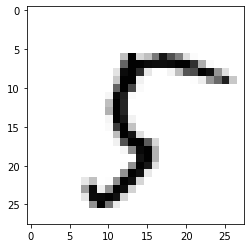

In [26]:
n = 779

print('神經網路預測是:', classes_x[n])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

### 7. 儲存我們的 model

In [24]:
model.save("my_nn.h5")

In [25]:
tf.test.gpu_device_name()

'/device:GPU:0'